# Euler and Runge Kutta Methods

## Introduction

The main objective is to investigate two methods -- the Euler method and the second order Runge-Kutta method -- allowing to solve numerically a Cauchy problem which has the form:

\begin{align}
y' &= f(y) \\
y(0) &= \alpha
\end{align}


To do so, we will focus on the problem of the thermal cooling or heating of a body which is in contact with an environment at a temperature different than its own. This problem is governed by
the following differential equation:

\begin{equation}
\frac{dT(t)}{dt}=\kappa \left(T_{amb} - T(t) \right)
\end{equation}

This equation is also called "Newton's cooling law", where $T(t)$ is the body temperature as a function
of time, $T_{amb}$ the assumed constant ambient temperature and $\kappa$ a proportionality constant of units $[s^{-1}]$.

For a question of clarity within this notebook (in both markdown and code cells), $T$ will refer to the Temperature when $t$ will refer to the time.

Let's consider the following Cauchy problem:

\begin{align}
\frac{dT(t)}{dt} &= \kappa (T_{amb}-T) \\
T(t=0) &= T_0
\end{align}

where:
\begin{align*}
T_{amb} &= 20 \; [°C] \\
T_0 &= 10 \; [°C] \\
\kappa &= 0.2 \; [s^{-1}] \\
t_{max} &= 50 \; s \\
\end{align*}

0. **Define the constants of the problems for the rest of the session**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fix a set of parameters
T0 = 10      # Initial temperature
tmax = 50    # Time up to which perform the simulation
kappa = 0.2  # Constant of the problem
Tamb = 20    # Temperature of the environment

1. **Show that the exact solution is the one shown below.**

\begin{equation}
T_s = T_{amb} + (T_0 - T_{amb}) \times e^{-\kappa t}
\end{equation}

We substitute this solution into the differential equation and check if it satisfies both the differential equation and the initial condition.

Given solution:
\begin{equation}
T_s = T_{amb} + (T_0 - T_{amb}) \times e^{-\kappa t}
\end{equation}

The first step is to calculate $\frac{dT(s)}{dt}$ :
\begin{equation}
\frac{dT(s)}{dt} = -\kappa \times (T_0 - T_{amb}) \times e^{-\kappa t}
\end{equation}
Substituting $T_s$ and $\frac{dT_s}{dt}$ into the differential equation:

\begin{equation} -\kappa \times (T_0 - T_{amb}) \times e^{-\kappa t} = \kappa \times (T_{amb} - (T_{amb} + (T_0 - T_{amb}) \times e^{-\kappa t})) \end{equation}

\begin{equation} -\kappa \times (T_0 - T_{amb}) \times e^{-\kappa t} = -\kappa \times (T_0 - T_{amb}) \times e^{-\kappa t} \end{equation}

After simplifying, we see that the equation is satified by the given solution.

What's left is to check the initial condition $T(t=0) = T_0$:

\begin{equation} T_s(t=0) = T_{amb} + (T_0 - T_{amb}) \times e^{-\kappa \times 0} = T_{amb} + (T_0 - T_{amb}) = T_0 \end{equation}

The initial condition is also satisfied.

Therefore, the given function $T_s$ is indeed the exact solution to the given differential equation with the specified initial condition.

2. **Define a function corresponding to the right hand side of the Newton's cooling law.**

<div class="alert alert-block alert-info">
<b>Note:</b> When creating a function, remember to include explicit documentation on what it does and what it needs as input data.
</div>

In [4]:
def NCL(T, kappa=kappa, Tamb=Tamb):
    """
    Function which returns the right hand side of Newton's Cooling Law
    
    Parameters:
    T : float
        Actual temperature
    Tamb : float
        Ambiant temperature
    kappa : float
        Temprature change rate
        
    Output:
        float
    
    """
    return kappa * (Tamb - T)

## Euler's method

The Euler's method can be easily understood starting from the differential operator:

\begin{equation}
y' \left( t \right) \approx \frac{y(t+\delta t) - y(t)}{\delta t}
\end{equation}

Which can be re-written as:

\begin{equation}
y(t+\delta t) \approx y(t) + \delta t \times y' \left( t \right)
\end{equation}

Then, using the property of a Cauchy problem $y'=f(y)$ one can finally obtain:

\begin{equation}
y(t+\delta t) \approx y(t) + \delta t \times f \left( y \left( t \right) \right)
\end{equation}

Since the initial condition is known from the problem's definition, one can compute from the previous formula an approximation of $y(\delta t)$. Therefore, it is possible to process iteratively and obtain an approximated value of $y(t_{max})$


3. **Now complete the function below so that it applies the Euler method**

In [5]:
def Euler(alpha, tmax, dt, func):
    """ Function to integrate a Cauchy problem of the following form
                    y'=func(y) & y(0)=alpha
    from 0 to tmax with a step dt.
    
    Parameters
    ----------
    T0 : float
        Initial temperature of the Cauchy problem
    tmax : float
        Value to be reched by the integration
    dt : float
        Integration timestep
    func  : python function
        Right Hand Side of the Cauchy problem
    
    Output
    ----------
    1D numpy.array
        Discretization on which approximated values have been computed 
    1D numpy.array
        Values of the approximated solution on the output discretization 
    """
    # Preliminary computations
    N = int(tmax / dt)  # Number of iterations to get from 0 to tmax with time step dt
    y = np.zeros(N + 1)  # Vector to store the results.
    t = np.zeros(N + 1)  # Vector to store the time discretization (useful for plotting).
    
    # Intialization
    y[0] = alpha
    t[0] = 0

    for i in range(N):
        y[i + 1] = y[i] + dt * func(y[i])
        t[i + 1] = t[i] + dt
    return t, y

4. **In order to assess the capability of our numerical method it is also necessary to compare it to the exact solution. Complete the function below to compute the exact solution according to question 1.**

In [6]:
def Tex(T0, t, Tamb=Tamb, kappa=kappa):
    """ Function that returns the solution to the Newton's Cooling law
    
    Parameters
    ----------
    T0 : float
        Initial temperature for the Cauchy problem
    t  : numpy.array
        Vector of time at which to compute the exact solution
    Tamb : float
        Ambient temperature for the Cauchy problem
    kappa : float
    
        
    Output
    ----------
    float or numpy.array (1D)
        Exact solution to the Newton's cooling law problem
    """
    sol = Tamb + (T0 - Tamb) * np.exp (-kappa * t)
    return sol

#example usage
t_exact = np.linspace(0, tmax, 1000)
exact_solution = Tex(T0, t_exact)

5. **Make a function using matplotlib.pyplot to plot the exact and computed solution of the cauchy problem.**

In [7]:
def plot_approx_vs_orig(xapprox, yapprox, xexact, yexact):
    """ Minimal function to compare visually an exact solution and
    an approximated solution to a 1D problem.
    
    Parameters
    ----------
    xapprox : numpy.array (1D)
        Discretization of the approximated solution
    yapprox : numpy.array (1D)
        Values of the approximated solution
    xexact : numpy.array (1D)
        Discretization of the exact solution
    yexact : numpy.array (1D)
        Values of the exact solution
        
    Output
    ----------
    None :
        No output but it will display a graphic using plt.show()
    """
    fig, ax = plt.subplots()
    ax.plot(xapprox, yapprox, label='Approximated Solution', linestyle='--', marker='o', color='purple')
    ax.plot(xexact, yexact, label='Exact Solution', linestyle='--', marker='o', color='pink')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    ax.set_title('Comparison of Exact and Approximated Solutions')
    ax.legend()
    plt.show()
    return None

5. **Use the Euler's method to solve the problem with different time steps. Among these, identify time steps for which we obtain the following behaviors:**
    1. **Divergence of the solution: solution going towards $\infty$ or $-\infty$**
    2. **The solution does not converge towards the exact solution without reaching $\pm \infty$**
    3. **The solution looks alike the exact solution**

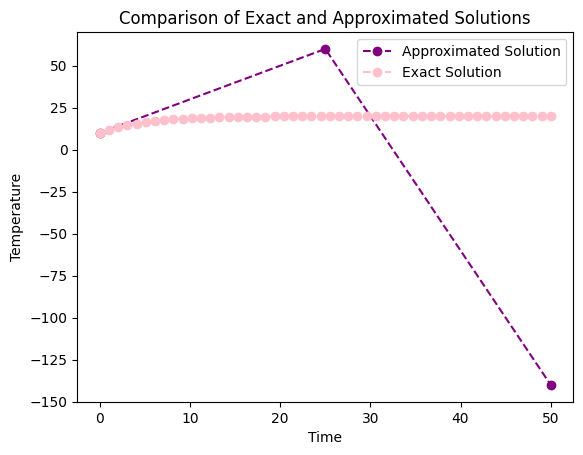

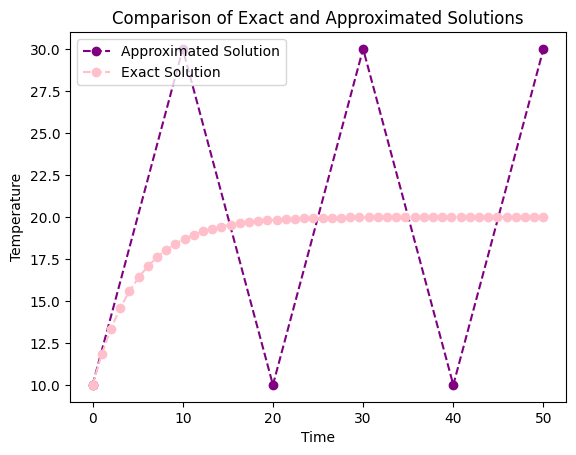

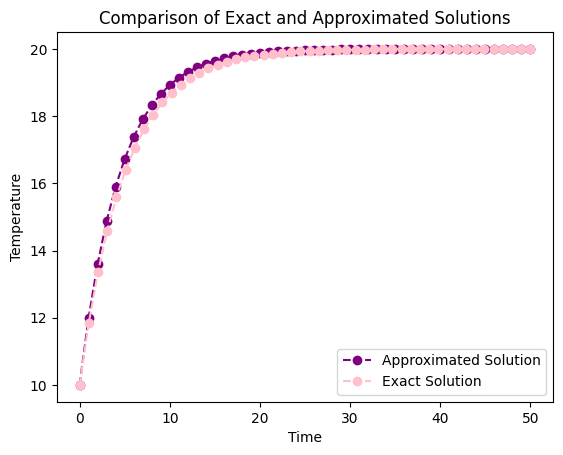

In [8]:
# Compute the exact solution once
disc_ex = np.linspace(0, tmax)
exact = Tex(T0, disc_ex)

# Loop over a set of time steps to illustrate the 3 scenarios 
dts = [25, 10, 1]
for dt in dts:
    disc, approx = Euler(T0, tmax, dt, NCL)
    plot_approx_vs_orig(disc, approx, disc_ex, exact)

6. **For a list of time steps belonging to case (5C) compute the maximal numerical error according to the formula:**

\begin{equation}
\epsilon(dt) = \max_{0 \le t \leq t_{max}}\left( \left| T_{num}(t) - T_{ex}(t)\right| \right)
\end{equation}

In [9]:
# Example set of time steps
dts = np.array([2, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001])
errors = np.empty(dts.shape)

# define function to compute the maximum numerical error
def max_numerical_error(approx_solution, exact_solution):
    return np.max(np.abs(approx_solution - exact_solution))

for i, dt in enumerate(dts):
    disc, approx = Euler(T0, tmax, dt, NCL)
    disc_ex = np.linspace(0, tmax, len(disc))
    exact_solution = Tex(T0, disc_ex)
    
    errors[i] = max_numerical_error(approx, exact_solution)

print(errors)

[8.93289641e-01 4.01994412e-01 1.92010011e-01 3.70976108e-02
 1.84709990e-02 3.68186314e-03 1.84016400e-03 3.67910101e-04]


7. **Plot on a log-log scale the error $\epsilon$ as a function of the time step $dt$ used in 6.**

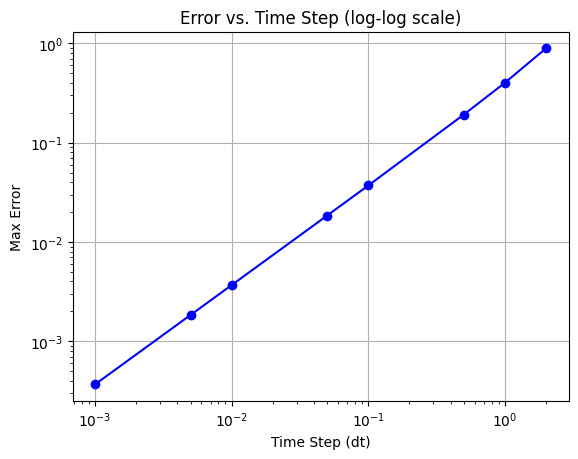

In [10]:
plt.loglog(dts, errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Time Step (dt)')
plt.ylabel('Max Error')
plt.title('Error vs. Time Step (log-log scale)')
plt.grid(True)
plt.show()

8. **You should observe that the points are aligned. Fit the points using numpy.polyfit to get the slope of the line. Remember that polyfit uses polynomial models of order n such as $p(x)=P[0] + P[1] x^1 + \cdots + P[n] x^n$. Print the results to the screen.**

Slope (order of convergence): 1.0196482667467683


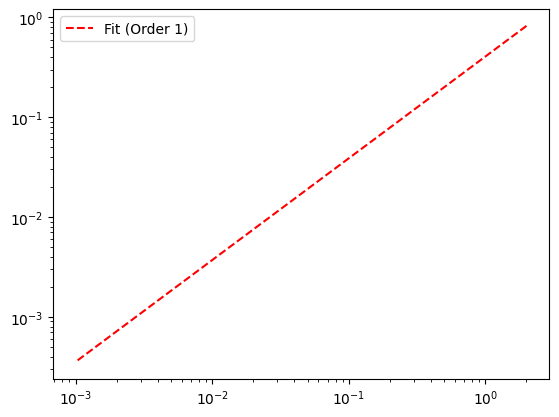

In [11]:
#Fit the points using numpy.polyfit
degree = 1 # Degree of the polynomial (for linear fit)
coefficients = np.polyfit(np.log(dts), np.log(errors), degree)
slope = coefficients[0]
print(f'Slope (order of convergence): {slope}')

#Add fitted line to the plot
fit_line = np.exp(np.polyval(coefficients, np.log(dts)))
plt.loglog(dts, fit_line, linestyle='--', color='red', label=f'Fit (Order {degree})')
plt.legend()

plt.show()

9. **To check that everything went all right, copy the plot of the previous question and verify that this model and the points do superimpose.**

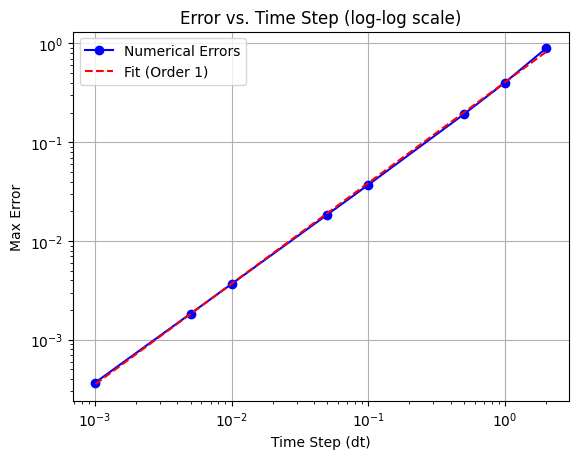

In [12]:
# Plotting the log-log scale
plt.loglog(dts, errors, marker='o', linestyle='-', color='blue', label='Numerical Errors')
plt.xlabel('Time Step (dt)')
plt.ylabel('Max Error')
plt.title('Error vs. Time Step (log-log scale)')
plt.grid(True)

# Fit the points using numpy.polyfit
degree = 1  # Degree of the polynomial (for linear fit)
coefficients = np.polyfit(np.log(dts), np.log(errors), degree)
slope = coefficients[0]

# Add fitted line to the plot
fit_line = np.exp(np.polyval(coefficients, np.log(dts)))
plt.loglog(dts, fit_line, linestyle='--', color='red', label=f'Fit (Order {degree})')
plt.legend()

plt.show()

## Runge Kutta of order 2

In a similar fashion as for the Euler's method, one can write from the differential operator:

\begin{equation}
y'\left(t+\frac{dt}{2} \right) \approx \frac{y(t+dt) - y(t)}{dt}
\end{equation}

Which, once re-written yields to

\begin{equation}
y(t+dt) \approx y(t) + dt \times y'\left(t+\frac{dt}{2} \right)
\end{equation}

Using the definition of a Cauchy problem ($y'=f(y)$):

\begin{equation}
y(t+dt) \approx y(t) + dt \times f \left( y\left(t+\frac{dt}{2} \right) \right)
\end{equation}

This formula can not be used straight away because $y\left(t+\frac{dt}{2} \right)$ is not known. However it is possible to compute it first from the Euler's formula:

\begin{equation}
y \left( t+\frac{dt}{2} \right) \approx y(t) + \frac{dt}{2} \times f \left( y\left(t \right) \right)
\end{equation}

And then to proceed to the computation yielding to the result.


9. **Do the same study with the Runge Kutta Method as the one you performed with the Euler's method (Code the method, explore the behaviour of the method and finally compute the convergence order).**

In [13]:
def RK2(alpha, tmax, dt, function):
    """ Function to integrate a Cauchy problem of the following form
                    y'=func(y) & y(0)=alpha
    from 0 to tmax with a step dt using the Runge Kutta of order 2 scheme.
    
    Parameters
    ----------
    alpha : float
        Initialization of the cauchy problem
    tmax : float
        Final value to be reached by the integration
    dt : float
        Step at which to go forward in the integrating direction
    function  : python function
        Right Hand Side of the Cauchy problem
    
    Output
    ----------
    1D numpy.array
        Discretization on which approximated values have been computed 
    1D numpy.array
        Values of the approximated solution on the output discretization 
    """
    # Initial computations
    dt_2 = dt / 2
    N = int(tmax / dt)
    
    # Initializations
    y = np.zeros(N + 1)
    disc = np.zeros(N + 1)
    y[0] = alpha
    
    # Integrate over time
    for i in range(N):
        y_interm = y[i] + dt_2 * function(y[i])
        derivee_interm = function(y_interm)
        y[i + 1] = y[i] + dt * derivee_interm
        disc[i + 1] = disc[i] + dt
    return disc, y

10. **Use the Euler's method to solve the problem with different time steps. Among these, identify time steps for which we obtain the following behaviors:**
    1. **Divergence of the solution: solution going towards $\infty$ or $-\infty$**
    2. **The solution does not converge towards the exact solution without reaching $\pm \infty$**
    3. **The solution looks alike the exact solution**

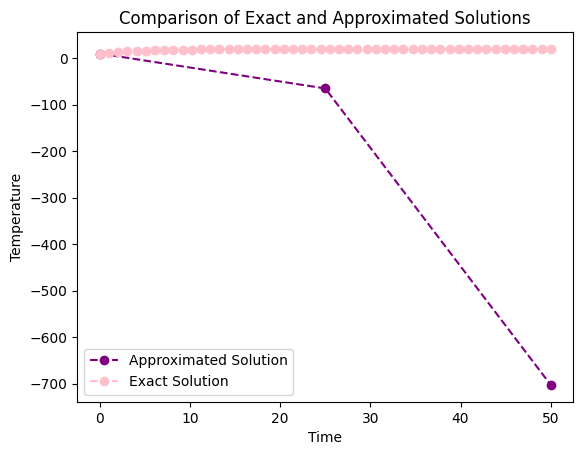

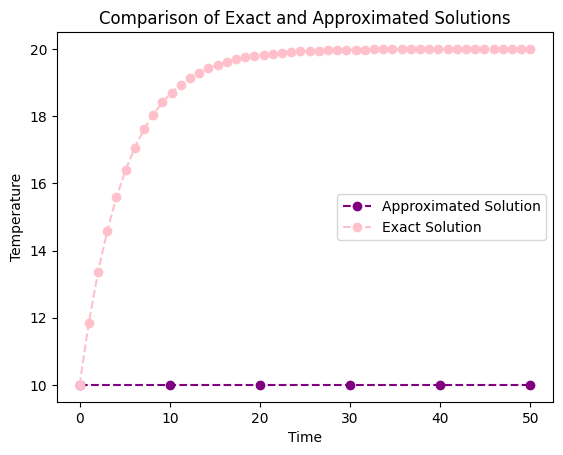

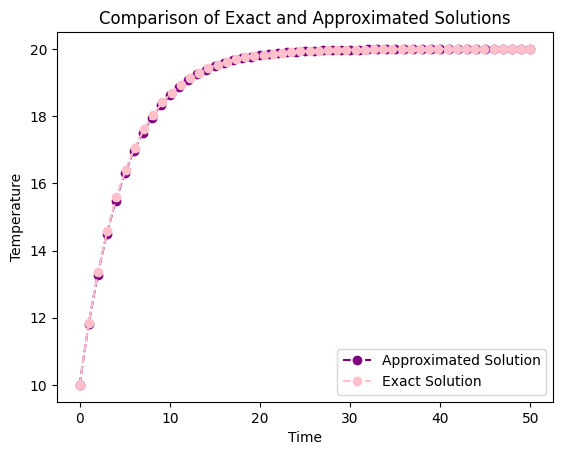

In [14]:
# Compute the exact solution once
disc_ex = np.linspace(0, tmax)
exact = Tex(T0, disc_ex)

# Loop over a set of time steps to illustrate the 3 scenarios 
dts = [25, 10, 1]
for dt in dts:
    disc, approx = RK2(T0, tmax, dt, NCL)
    plot_approx_vs_orig(disc, approx, disc_ex, exact)

11. **For a list of time steps belonging to case (5C) compute the maximal numerical error according to the formula:**

\begin{equation}
\epsilon(dt) = \max_{0 \le t \leq t_{max}}\left( \left| T_{num}(t) - T_{ex}(t)\right| \right)
\end{equation}

In [15]:
# Example set of time steps
dts = np.array([2, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001])
errors = np.empty(dts.shape)

# define function to compute the maximum numerical error
def max_numerical_error(approx_solution, exact_solution):
    return np.max(np.abs(approx_solution - exact_solution))

for i, dt in enumerate(dts):
    disc, approx = RK2(T0, tmax, dt, NCL)
    disc_ex = np.linspace(0, tmax, len(disc))
    exact_solution = Tex(T0, disc_ex)
    
    errors[i] = max_numerical_error(approx, exact_solution)

print(errors)

[1.32377881e-01 2.86040203e-02 6.61543662e-03 2.48969606e-04
 6.17754475e-05 2.45621216e-06 6.13592473e-07 2.45289975e-08]


12. **Plot on a log-log scale the error $\epsilon$ as a function of the time step $dt$ used in 11.**

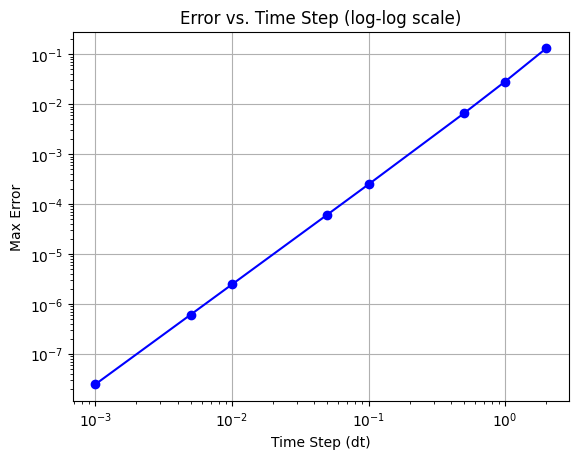

In [16]:
plt.loglog(dts, errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Time Step (dt)')
plt.ylabel('Max Error')
plt.title('Error vs. Time Step (log-log scale)')
plt.grid(True)
plt.show()

13. **You should observe that the points are aligned. Fit the points using numpy.polyfit to get the slope of the line. Print the results.**

Slope (order of convergence): 2.031650881708383


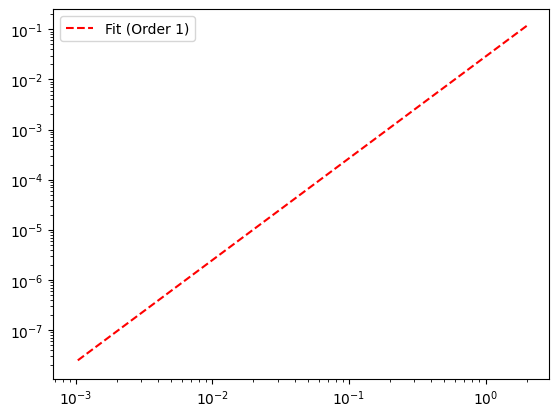

In [17]:
#Fit the points using numpy.polyfit
degree = 1 # Degree of the polynomial (for linear fit)
coefficients = np.polyfit(np.log(dts), np.log(errors), degree)
slope = coefficients[0]
print(f'Slope (order of convergence): {slope}')

#Add fitted line to the plot
fit_line = np.exp(np.polyval(coefficients, np.log(dts)))
plt.loglog(dts, fit_line, linestyle='--', color='red', label=f'Fit (Order {degree})')
plt.legend()

plt.show()

14. **To check that everything went all right, copy the plot of the previous question and verify that this model and the points do superimpose.**

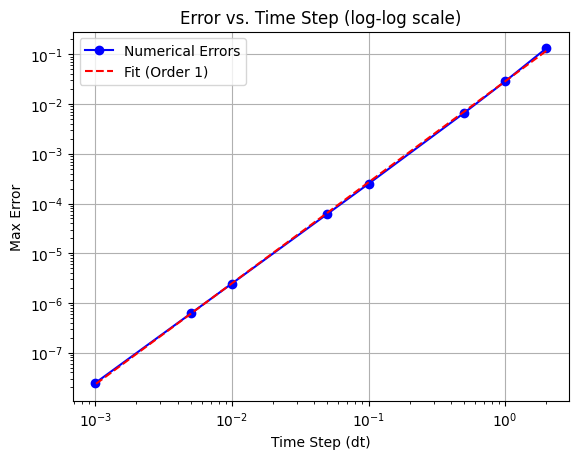

In [18]:
# Plotting the log-log scale
plt.loglog(dts, errors, marker='o', linestyle='-', color='blue', label='Numerical Errors')
plt.xlabel('Time Step (dt)')
plt.ylabel('Max Error')
plt.title('Error vs. Time Step (log-log scale)')
plt.grid(True)

# Fit the points using numpy.polyfit
degree = 1  # Degree of the polynomial (for linear fit)
coefficients = np.polyfit(np.log(dts), np.log(errors), degree)
slope = coefficients[0]

# Add fitted line to the plot
fit_line = np.exp(np.polyval(coefficients, np.log(dts)))
plt.loglog(dts, fit_line, linestyle='--', color='red', label=f'Fit (Order {degree})')
plt.legend()

plt.show()

# Compare Euler and RK methods

15. **According to what you have done, which method appears to be the best and why ?**

The Runge Kutta method exhibited a convergence order of 2, while the Euler method had a convergence order of 1. This implies that the RK method achieves a higher level of accuracy for the same reduction in timestep size compared to the Euler method.

While the RK method incurs a higher computational cost by calling the right-hand side function twice per timestep, the improved accuracy may justify this expense in situations where accuracy is a primary concern. If computational efficiency is crucial and a first-order method is sufficient, the Euler method might be preferred. However, in this case, the improvement in accuracy leads us to believe that the Runge Kutta method is preferable.

# Built-in functions
Similarly as for integration methods, built-in functions for solving ODEs exist in python. One can use _odeint_ in _scipy_ to do so. Take a look at [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to know what the function is expecting as arguments. If the format of your _callable_ (the RHS function here) is not the one exptected, you could use a [lambda](https://realpython.com/python-lambda/) instead of copy/pasting or modifying your function.
11. **Use a built-in function to solve the Cauchy problem**

In [27]:
from scipy.integrate import odeint

# Define a lambda to get NCL in the correct format
# Our RHS is independant of t, so we take it as
# argument but it is actually unused.
odefunc = lambda y, t: NCL(y)

# Set the initial condition
initial_condition = [T0]

# Define the time points at which to compute the solution
time_points = np.linspace(0, tmax, 18)  

# Use odeint to solve the Cauchy problem
numerical_solution = odeint(odefunc, initial_condition, time_points)

# Calculate the exact solution
exact_solution = Tex(T0, time_points)

# Calculate the maximum absolute error using the provided max_numerical_error function
max_error = max_numerical_error(numerical_solution[:, 0], exact_solution)

# Print the maximum absolute error
print(f"Maximum absolute error is {max_error}")


Maximum absolute error is 1.5431416855449243e-07
